Task : 

Titanic Passenger Survival Prediction - The Titanic dataset contains data on passengers aboard the Titanic, where the task is to predict whether a passenger survived or not based on various features. Implement all the Classification Algorithms and highlight the best one.


In [52]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [53]:
# Load data sets
train_df = pd.read_csv('C:/Users/SREELETHA M S/Downloads/train.csv')
test_df = pd.read_csv('C:/Users/SREELETHA M S/Downloads/test.csv')

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Cleaning

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
# Check for null values in train_df
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# Dropping Cabin,PassengerId,Name,Fare,Ticket columns  since it’s unlikely to yield any useful information.
train_df=train_df.drop(columns=["PassengerId","Fare","Cabin","Name","Ticket"])

#processing Age column
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())

# replacing the missing values in the Embarked feature with mode()
train_df["Embarked"]=train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

# Re-Check for null values
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [59]:
# Check for null values in test_df
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
# Dropping Cabin,PassengerId,Name,Ticket columns  since it’s unlikely to yield any useful information.
X_test= test_df.drop(columns=["PassengerId","Name","Cabin","Ticket"],axis=1)

#processing Age column and fare column
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

# Re-Check for null values
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
# Label encode categorical data of both train_df and X_test
cols=["Sex","Embarked"]
label=LabelEncoder()
for col in cols:
    train_df[col]=label.fit_transform(train_df[col])

train_df.head()

# for test_df
for col in cols:
    X_test[col]=label.fit_transform(X_test[col])

Training data

In [62]:
# Selecting input and output features
X=train_df.drop(columns=["Survived"],axis=1)
Y=train_df["Survived"]

# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# Define models DecisionTree,RandomForest and SVC
models={
    "Logistic Regressor Classifier":LogisticRegression(), 
    "KNN Classifier":KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2),
    "Decision Tree Classifier":DecisionTreeClassifier(criterion='entropy'),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100,criterion='gini'), 
    "Support Vector Classifier":SVC(kernel='linear')
}

# Model Evaluation using accuracy_score()
acc_score={}
for model,classifier in models.items(): 
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    acc_score[model]=accuracy
    print(f"{model} Accuracy:{accuracy:.2f}")
    print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

Logistic Regressor Classifier Accuracy:0.79
Confusion Matrix :
 [[99 18]
 [20 42]]
KNN Classifier Accuracy:0.81
Confusion Matrix :
 [[103  14]
 [ 20  42]]
Decision Tree Classifier Accuracy:0.83
Confusion Matrix :
 [[104  13]
 [ 17  45]]
Random Forest Classifier Accuracy:0.83
Confusion Matrix :
 [[101  16]
 [ 15  47]]
Support Vector Classifier Accuracy:0.77
Confusion Matrix :
 [[99 18]
 [23 39]]


Performance Comparison

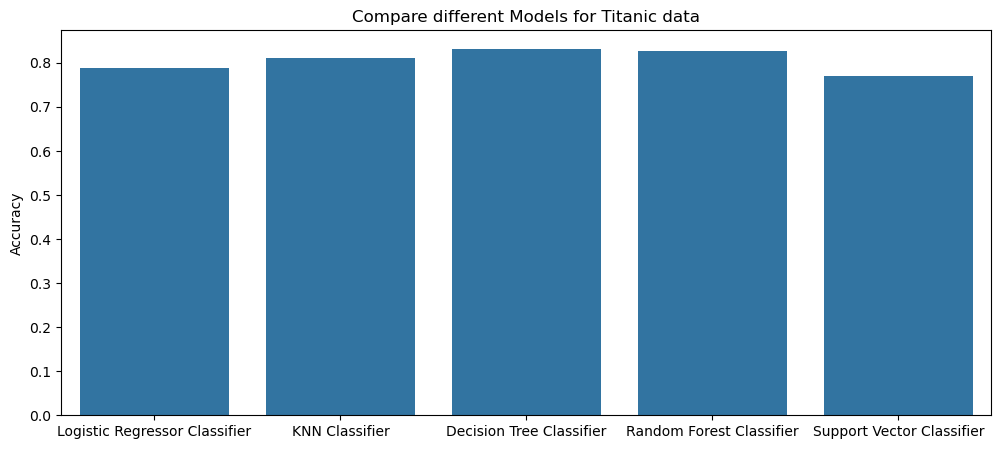

In [63]:
plt.figure(figsize=(12,5))
sns.barplot(x=list(acc_score.keys()),y=list(acc_score.values()))
plt.ylabel("Accuracy")
plt.title("Compare different Models for Titanic data")
plt.show()

Observation

From performance evaluation it is evident that LogisticRegression Classifier and Randon Forest classifier gives almost same levels of accuracy. Since the RandomForestClassifier() algorithm is better than Logistic in terms of handling high dimensional data,outliers,missing values etc, we choose RandomForestClassifier() model for prediction.

In [64]:
#Create RandomForest classifier
classifier=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=3)

# Train the model
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [65]:
# Make predictions on test data
y_pred=classifier.predict(x_test)
df=pd.DataFrame(data={'Actual Value':y_test,'Predicted Value':y_pred})
df.head()

,Actual Value,Predicted Value
110,0,0
119,0,0
347,1,1
130,0,0
217,0,0


In [66]:
# Model Evaluation
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

Accuracy : 0.8435754189944135
Confusion Matrix :
 [[107  10]
 [ 18  44]]


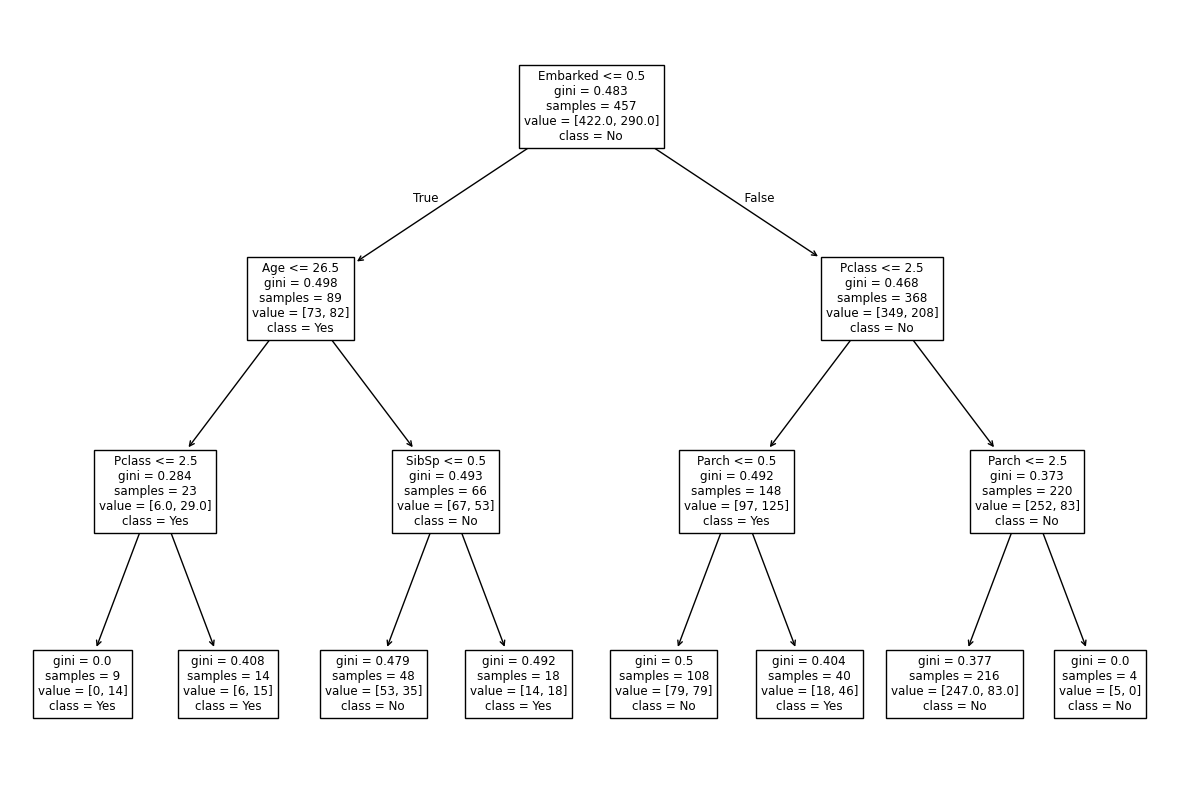

In [67]:
# select one tree from forest 
tree=classifier.estimators_[0]
# plot decision tree
plt.figure(figsize=(15,10))
plot_tree(tree,feature_names=['Pclass','Sex','Age','SibSp','Parch','Embarked'],class_names=['No','Yes'])
plt.show()

Model Testing

In [68]:
X_test=X_test.drop(columns=['Fare'],axis=1)
pred=classifier.predict(X_test)
df1=pd.DataFrame(data={'PassengerId':test_df['PassengerId'],'Predicted Value':pred})
df1.head()

,PassengerId,Predicted Value
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
